## Time Series Analysis - STL Decomposition

In this analysis, we demonstrate a common technique in time series analysis—STL Decomposition. STL (Seasonal-Trend decomposition using Loess) is a method that breaks down a time series into three key components: trend, seasonality, and residual (or noise). 

---

- The trend component represents the long-term progression in the data.

- The seasonal component captures recurring patterns or cycles.

- The residual component contains irregular, unpredictable fluctuations (for example, major economic data will have a peaked observed during 2019 covid pandemic). 

STL decomposition is useful for understanding underlying patterns in time series data, which can aid in forecasting and anomaly detection.

For this analysis, we fetched the data from FRED data base and the process of daily and monthly data has slightly different steps.

For the daily data, we resampled it to a monthly frequency to effectively capture seasonality and trend. In contrast, monthly data did not require resampling. The functions used for these analyses are named decompose_time_series_daily_data and decompose_time_series_monthly_data to distinguish between the two processes.

### Package Load

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from pandas_datareader import data as pdr

### STL Decomposition Function for montly data

There are some Monthly data from FRED you may run with.

Monthly Data Tickers:

"GDP" - Gross Domestic Product

"REAINTRATREARAT10Y" - Real 10-Year Treasury Rate


In [54]:

def decompose_time_series_monthly_data(ticker, start_date, end_date, seasonal=13):
    """
    Fetches data for the specified FRED ticker, performs STL decomposition, 
    and plots the observed, trend, seasonal, and residual components.
    
    Parameters:
    - ticker (str): FRED ticker symbol (e.g., 'UNRATE' for US unemployment rate).
    - start_date (str): Start date for the data in 'YYYY-MM-DD' format.
    - end_date (str): End date for the data in 'YYYY-MM-DD' format.
    - seasonal (int): Seasonal component length (default is 13 for monthly data with yearly seasonality).
    """
    
    # Fetch data from FRED
    data = pdr.get_data_fred(ticker, start=start_date, end=end_date)
    print(data.head())
    
    # Perform time series decomposition using STL
    stl = STL(data[ticker], seasonal=seasonal)
    result = stl.fit()
    
    # Plot the decomposed components
    plt.figure(figsize=(10, 8))
    
    # Plot observed data
    plt.subplot(4, 1, 1)
    plt.plot(data.index, data[ticker], label='Observed', color='black')
    plt.title(f"STL Decomposition  {ticker}")
    plt.ylabel(f"{ticker} Value")
    #plt.grid(True)
    
    # Plot trend component  ``
    plt.subplot(4, 1, 2)
    plt.plot(data.index, result.trend, label='Trend', color='blue')
    plt.title("Trend")
    plt.ylabel("Trend")
    #plt.grid(True)
    
    # Plot seasonal component
    plt.subplot(4, 1, 3)
    plt.plot(data.index, result.seasonal, label='Seasonal', color='orange')
    plt.title("Seasonal")
    plt.ylabel("Seasonal")
    #plt.grid(True)
    
    # Plot residual component
    plt.subplot(4, 1, 4)
    plt.plot(data.index, result.resid, label='Residual', color='red')
    plt.title("Residual")
    plt.ylabel("Residual")
    #plt.grid(True)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()



                  GDP
DATE                 
2010-01-01  14764.610
2010-04-01  14980.193
2010-07-01  15141.607
2010-10-01  15309.474
2011-01-01  15351.448


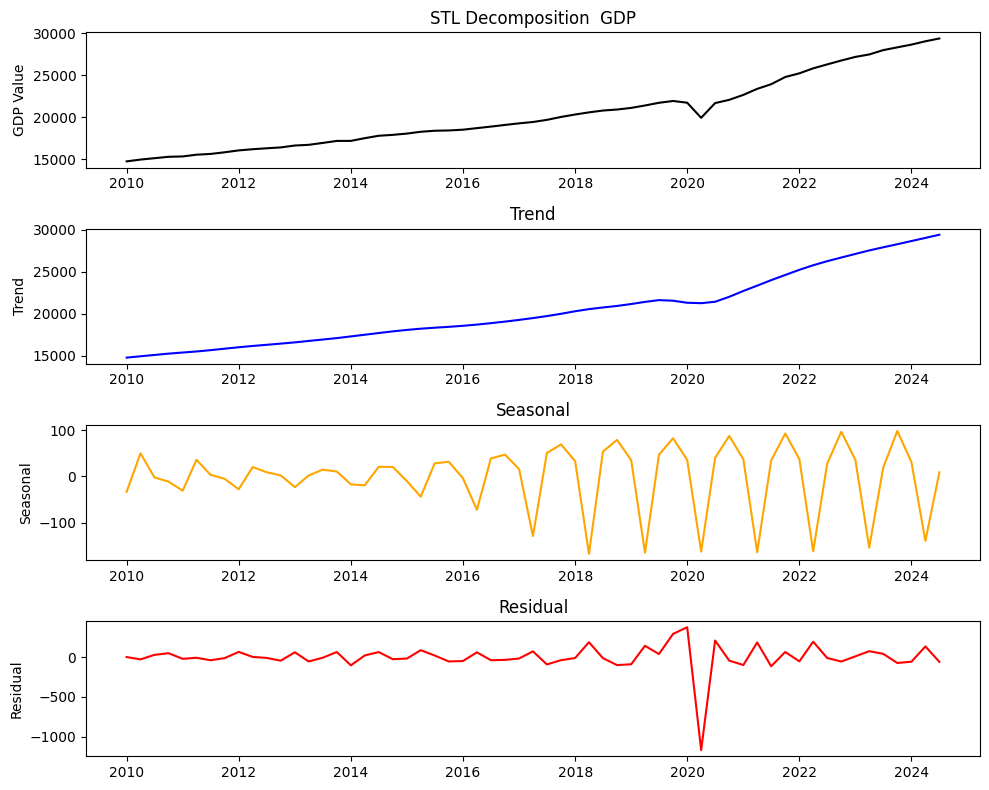

In [55]:
decompose_time_series_monthly_data(ticker="GDP", start_date="2010-01-01", end_date="2024-10-31", seasonal=13)

### STL Decomposition Function for daily data

There are some Daily data from FRED you may run with.

Daily Data Tickers:

"T10YIE": 10-Year Breakeven Inflation Rate

"DGS10": 10-Year Treasury Constant Maturity Rate


In [52]:

def decompose_time_series_daily_data(ticker, start_date, end_date, seasonal=13, frequency='M'):
    """
    Fetches data for the specified FRED ticker, performs STL decomposition,
    and plots the observed, trend, seasonal, and residual components.
    
    Parameters:
    - ticker (str): FRED ticker symbol (e.g., 'UNRATE' for US unemployment rate).
    - start_date (str): Start date for the data in 'YYYY-MM-DD' format.
    - end_date (str): End date for the data in 'YYYY-MM-DD' format.
    - seasonal (int): Seasonal component length (default is 13 for monthly data with yearly seasonality).
    - frequency (str): Resampling frequency (e.g., 'M' for monthly, 'W' for weekly).
    """
    
    # Fetch data from FRED
    data = pdr.get_data_fred(ticker, start=start_date, end=end_date)
    #print(data)
    #print("")
    
    # Resample to the specified frequency
    if frequency == 'M':
        data = data.resample('M').mean()  # Monthly average
    elif frequency == 'W':
        data = data.resample('W').mean()  # Weekly average
    print(data.head())
    
    # Perform time series decomposition using STL
    stl = STL(data[ticker], seasonal=seasonal)
    result = stl.fit()
    
    # Plot the decomposed components
    plt.figure(figsize=(10, 8))
    
    # Plot observed data
    plt.subplot(4, 1, 1)
    plt.plot(data.index, data[ticker], label='Observed', color='black')
    plt.title(f"STL Decomposition {ticker}")
    plt.ylabel(f"{ticker} Value")
    #plt.grid(True)
    
    # Plot trend component
    plt.subplot(4, 1, 2)
    plt.plot(data.index, result.trend, label='Trend', color='blue')
    plt.title("Trend")
    plt.ylabel("Trend")
    #plt.grid(True)
    
    # Plot seasonal component
    plt.subplot(4, 1, 3)
    plt.plot(data.index, result.seasonal, label='Seasonal', color='orange')
    plt.title("Seasonal")
    plt.ylabel("Seasonal")
    #plt.grid(True)
    
    # Plot residual component
    plt.subplot(4, 1, 4)
    plt.plot(data.index, result.resid, label='Residual', color='red')
    plt.title("Residual")
    plt.ylabel("Residual")
    #plt.grid(True)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_37800/3921409242.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean()  # Monthly average


               DGS10
DATE                
2010-01-31  3.733158
2010-02-28  3.691053
2010-03-31  3.727391
2010-04-30  3.846818
2010-05-31  3.420000


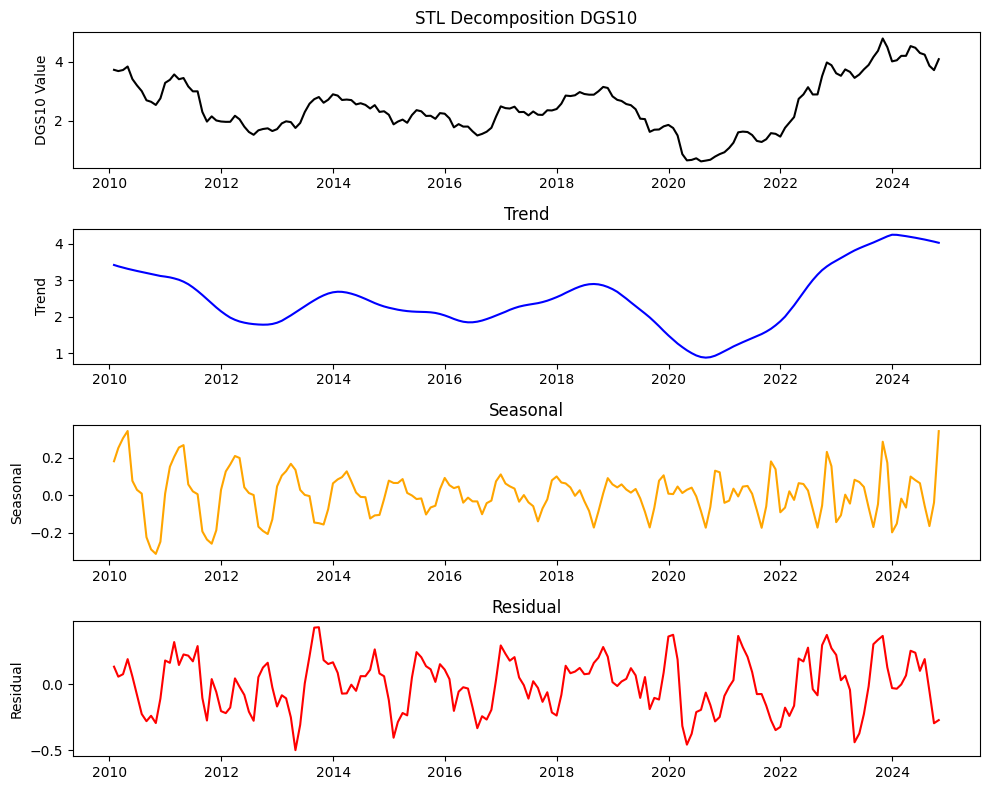

In [ ]:
decompose_time_series_daily_data(ticker="DGS10", start_date="2010-01-01", end_date="2024-10-31", seasonal=13, frequency='M')